# Heart Disease Prediction By-Gajendra Babu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Reading data

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [6]:
df.shape

(270, 14)

# Check if there any missing values in data

In [7]:
df.isna().sum().sum()

0

# Distribution of independent variables


In [8]:
import itertools
cols = [i for i in df.columns if i !='Heart Disease']
print(cols)

['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


# Frequency graph
Tells about the occurance 

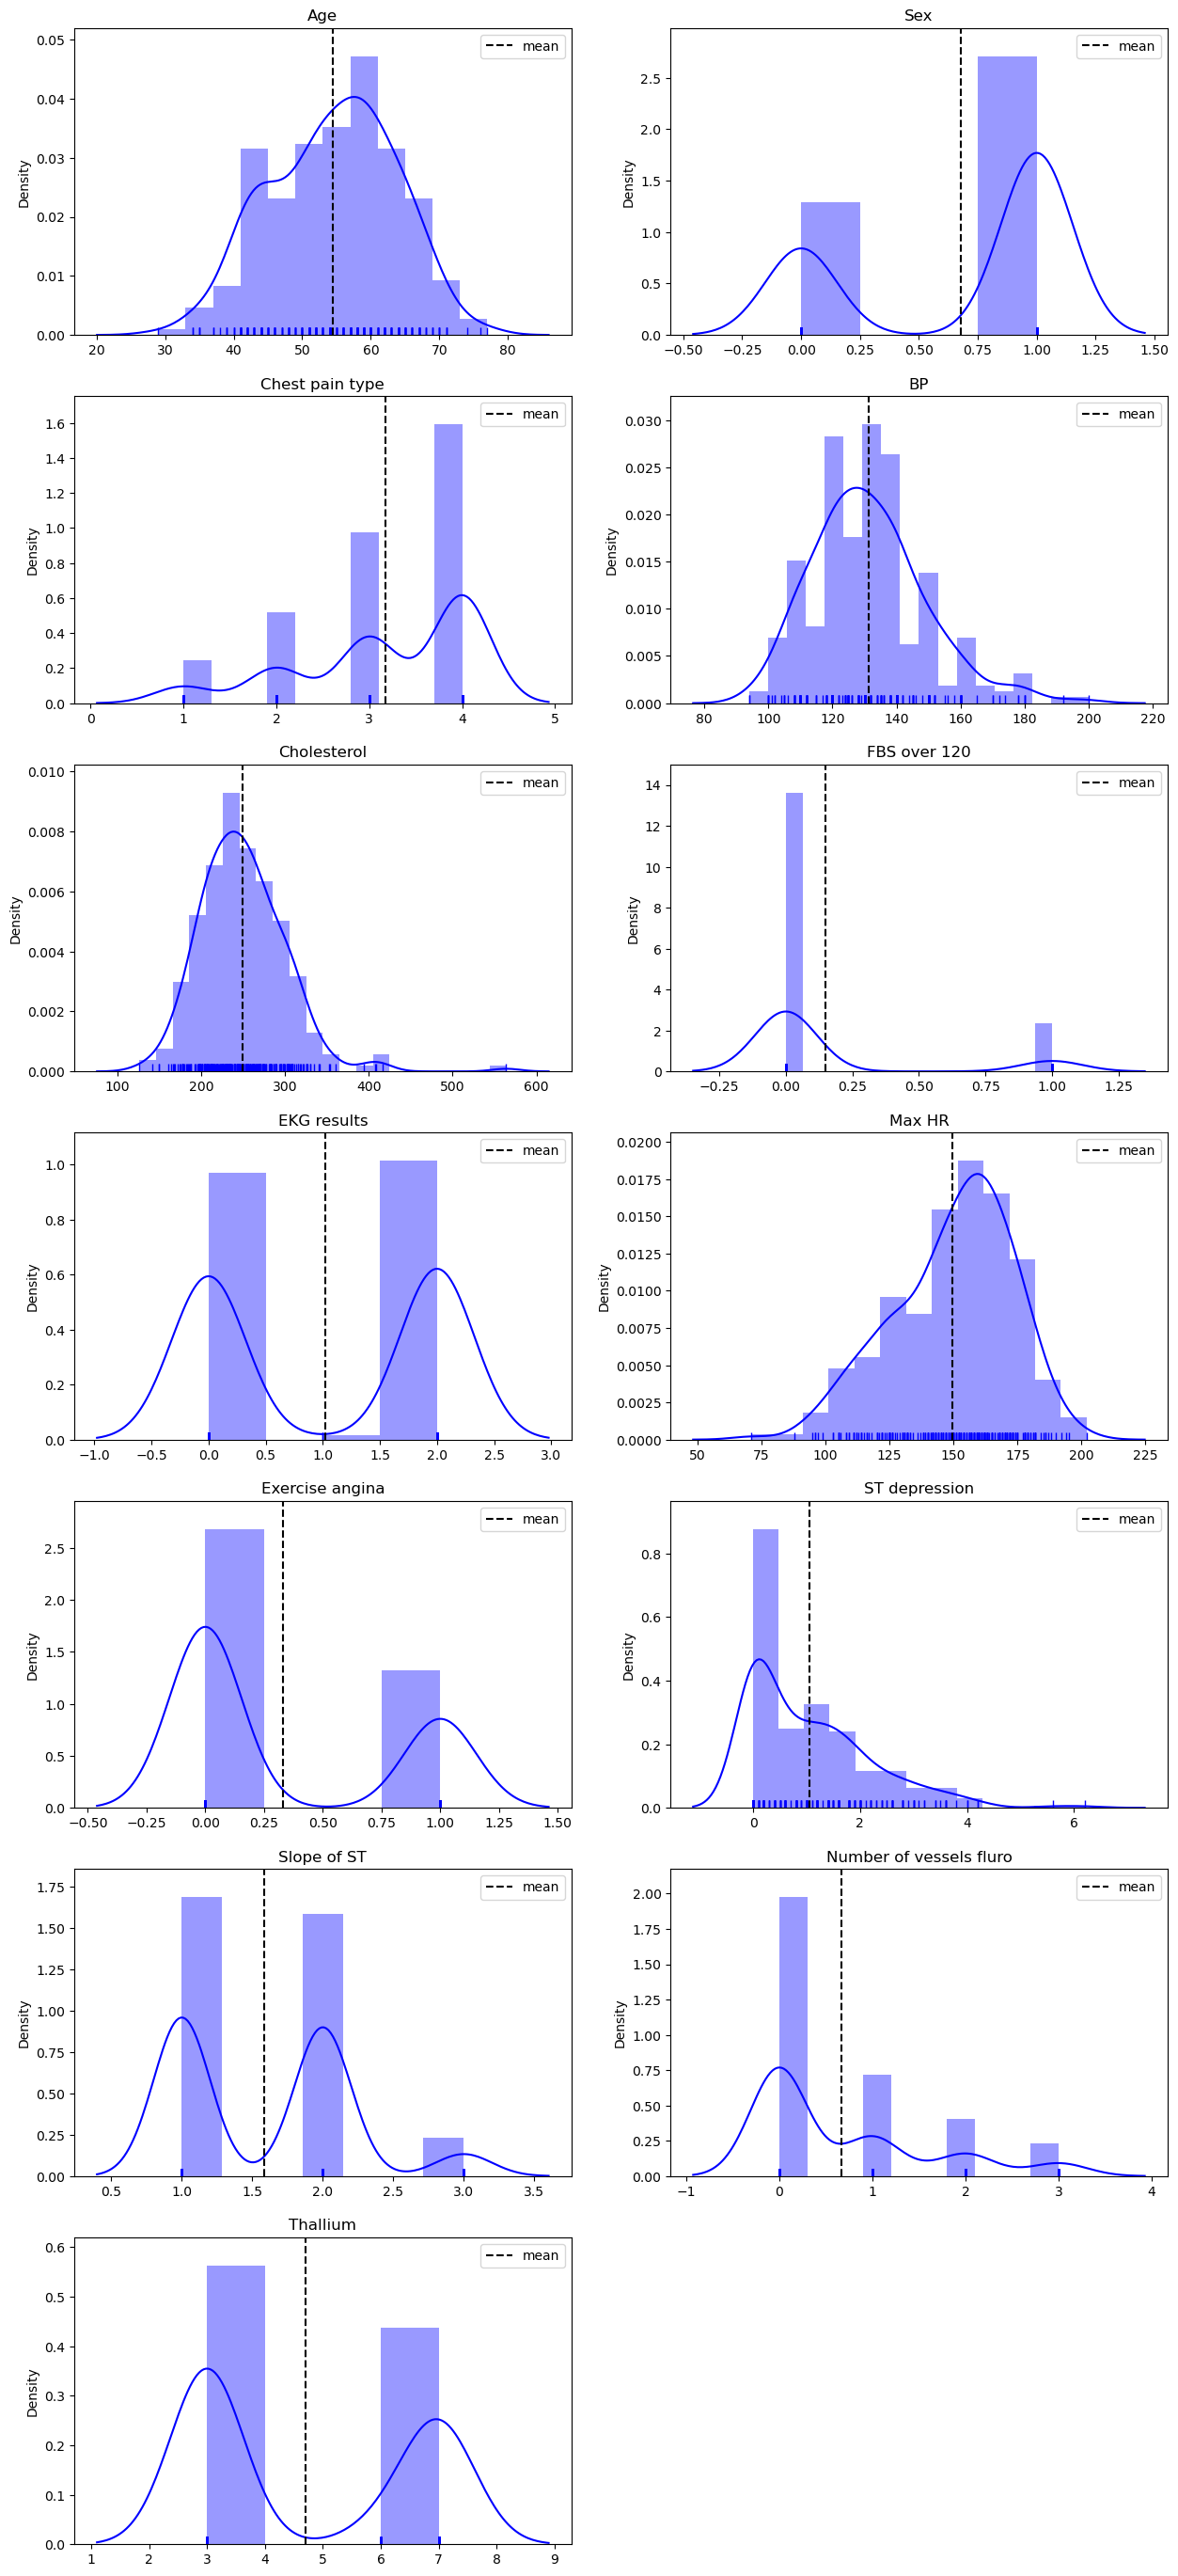

In [9]:
fig = plt.figure(figsize=(15, 50))
for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(10,2,j+1)
    ax = sns.distplot(df[i],color='blue',rug=True)
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

In [10]:
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [11]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

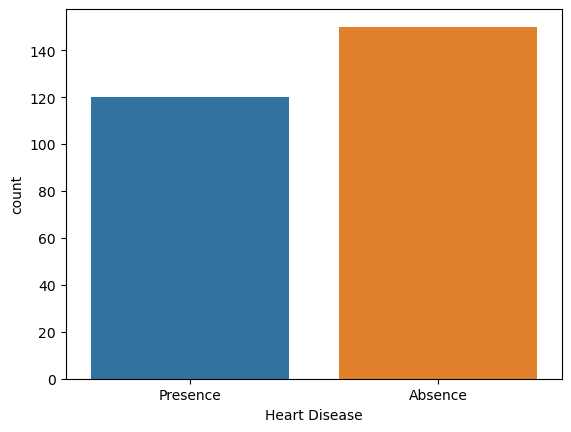

In [12]:
sns.countplot(x='Heart Disease', data=df)

In [13]:
df.corr().style.background_gradient(cmap='coolwarm')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


In [14]:
X=df.drop('Heart Disease',axis=1).values
y=df['Heart Disease'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state=42 )

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
scaler.transform(X_train)
X_train_scaled = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)





# Creating KNN Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 9)

In [17]:
knn.fit(X_train_scaled,y_train )

KNeighborsClassifier(n_neighbors=9)

In [18]:
from sklearn.metrics import r2_score

y_predict =knn.predict(X_test_scaled)

In [19]:
(y_test)

array(['Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence'], dtype=object)

# Predicted values

In [20]:
y_predict = knn.predict(X_test_scaled)
y_predict

array(['Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence'], dtype=object)

In [25]:
(y_test)

array(['Presence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence'], dtype=object)

In [ ]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

In [ ]:
print(accuracy_score(y_test,y_predict))

# SVM MODEL


In [ ]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_scaled,y_train)
y_predict = clf.predict(X_test_scaled)

In [ ]:
(y_test)

# Predicted values



In [ ]:
y_predict = clf.predict(X_test_scaled)
y_predict

In [ ]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

In [ ]:
print(accuracy_score(y_test,y_predict))

# RANDOM FOREST MODEL

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=12, max_depth=5)
rf.fit(X_train_scaled,y_train)
rf_predicted = rf.predict(X_test_scaled)

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)

In [ ]:
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Random Forest:",rf_acc_score)

# Conclusion

Best model among KKN ,SVM and Random forest is Random Forest.

Accuracy Score of best model is 0.8703703703703703

